In [3]:
import pandas as pd
import numpy as np
import seaborn

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC

from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import log_loss
from sklearn import metrics
from matplotlib import pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder

from sklearn.multiclass import OneVsRestClassifier

In [4]:
data = pd.read_csv('0422.csv')

C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (80) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
data1 = data[data['Matchweek'] != 1]

In [6]:
data2 = data1[data1['Matchweek'] != 2]

In [7]:
data = data2[data2['Matchweek'] != 3]

In [8]:
data

,Unnamed: 0,level_0,index,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,...,AwayGoal,HomeConceded,AwayConceded,HomeAvgPoint,AwayAvgPoint,Season,Matchweek,Home_code,Away_code,Venue_code
30,30,30,30,E0,28/08/04,Chelsea,Southampton,2,1,H,...,1.333333,0.000000,2.000000,3.000000,1.000000,2004,4,12,31,12
31,31,31,31,E0,28/08/04,Everton,West Brom,2,1,H,...,1.000000,2.500000,1.000000,1.500000,1.000000,2004,4,15,37,15
32,32,32,32,E0,28/08/04,Man City,Charlton,4,0,H,...,2.000000,1.333333,1.666667,0.333333,2.000000,2004,4,22,11,22
33,33,33,33,E0,28/08/04,Middlesbrough,Crystal Palace,2,1,H,...,0.666667,2.333333,2.000000,1.333333,0.333333,2004,4,24,13,24
34,34,34,34,E0,28/08/04,Norwich,Arsenal,1,4,A,...,4.000000,1.666667,1.333333,0.666667,3.000000,2004,4,26,0,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6835,6835,6835,375,E0,22/05/2022,Crystal Palace,Man United,1,0,H,...,1.540541,1.243243,1.513514,1.145119,2.024890,2021,38,13,23,13
6836,6836,6836,376,E0,22/05/2022,Leicester,Southampton,4,1,H,...,1.135135,1.567568,1.702703,1.458746,1.218225,2021,38,20,31,20
6837,6837,6837,377,E0,22/05/2022,Liverpool,Wolves,3,1,H,...,1.000000,0.675676,1.081081,1.925329,1.188679,2021,38,21,40,21
6838,6838,6838,378,E0,22/05/2022,Man City,Aston Villa,3,2,H,...,1.351351,0.648649,1.378378,1.919473,1.195079,2021,38,22,1,22


In [9]:
data['pastHP-AP'] = data['pastHP']-data['pastAP']
data['pastHG-AG'] = data['pastHG']-data['pastAG']
data['pastAGC-HGC'] = data['pastAGC']-data['pastHGC']
data['pastHS-AS'] = data['pastHS']-data['pastAS']
data['pastASC-HSC'] = data['pastASC']-data['pastHSC']
data['pastHST-AST'] = data['pastHST']-data['pastAST']
data['pastASTC-HSTC'] = data['pastASTC']-data['pastHSTC']
data['GoalDiff'] = (data['HomeGoal']-data['AwayGoal'])
data['ConcededDiff'] = (data['AwayConceded']-data['HomeConceded'])
data['PointDiff'] = data['HomeFullPoint'] - data['AwayFullPoint']
data['EloDiff'] = data['HomeAvgPoint']-data['AwayAvgPoint']

C:\Users\Admin\AppData\Local\Temp/ipykernel_3108/1238161194.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['pastHP-AP'] = data['pastHP']-data['pastAP']
C:\Users\Admin\AppData\Local\Temp/ipykernel_3108/1238161194.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['pastHG-AG'] = data['pastHG']-data['pastAG']
C:\Users\Admin\AppData\Local\Temp/ipykernel_3108/1238161194.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

In [15]:
X = data[['pastHP', 'pastAP', 'pastHG', 'pastAG', 'pastAGC', 'pastHGC', 'pastHS', 'pastAS', 'pastASC', 'pastHSC', 'pastHST' ,'pastAST', 'pastASTC', 'pastHSTC', 'pastHP-AP','pastHG-AG','pastAGC-HGC','pastHS-AS', 'pastHST-AST', 'pastASC-HSC',
        'pastASTC-HSTC', 'HomeFullPoint','AwayFullPoint','HomeGoal','AwayGoal','HomeConceded','AwayConceded','HomeAvgPoint','AwayAvgPoint']]

In [18]:
Y = data[['FTR']]
label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(Y)
label_encoded_y = label_encoder.transform(Y)
y = label_encoded_y

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [19]:
from sklearn.feature_selection import f_classif
f_scores, p_value = f_classif(X, y)

In [21]:
feature_scores = {x.columns[i]: f_scores[i] for i in range(len(x.columns))}
p_value_all = {x.columns[i]: p_value[i] for i in range(len(x.columns))}

In [22]:
print(feature_scores)

{'pastHP': 49.3067051338833, 'pastAP': 58.760225548214635, 'pastHG': 41.45859182975125, 'pastAG': 55.7981929158786, 'pastAGC': 41.7984701057631, 'pastHGC': 33.84686693623732, 'pastHS': 68.85449392084521, 'pastAS': 97.77507070200768, 'pastASC': 84.51269896731726, 'pastHSC': 75.31987138289678, 'pastHST': 65.18927360473057, 'pastAST': 53.59259846851811, 'pastASTC': 61.89797024175281, 'pastHSTC': 30.69727886540349, 'pastHP-AP': 112.46610460162259, 'pastHG-AG': 99.98733251283241, 'pastAGC-HGC': 77.6099228128662, 'pastHS-AS': 163.59150773601397, 'pastHST-AST': 156.44549659530708, 'pastASC-HSC': 172.75932821892349, 'pastASTC-HSTC': 115.48786851766639, 'HomeFullPoint': 190.84655275551674, 'AwayFullPoint': 220.13629263888583, 'HomeGoal': 167.57579343169027, 'AwayGoal': 194.90816826364357, 'HomeConceded': 123.55768126514351, 'AwayConceded': 127.76919772677488, 'HomeAvgPoint': 231.763024548623, 'AwayAvgPoint': 266.66708339807076}


In [23]:
print(p_value_all)

{'pastHP': 5.653437383532701e-22, 'pastAP': 5.199579197104957e-26, 'pastHG': 1.2950183147961066e-18, 'pastAG': 9.536259988561538e-25, 'pastAGC': 9.259654935444903e-19, 'pastHGC': 2.3929946854458115e-15, 'pastHS': 2.625176390583793e-30, 'pastAS': 1.523429920151234e-42, 'pastASC': 6.0333720839378426e-37, 'pastHSC': 4.722035201660596e-33, 'pastHST': 9.500920106698258e-29, 'pastAST': 8.334884961194072e-24, 'pastASTC': 2.392671430316557e-27, 'pastHSTC': 5.406452459800844e-14, 'pastHP-AP': 1.020269235512601e-48, 'pastHG-AG': 1.7836286033262127e-43, 'pastAGC-HGC': 5.048399575934708e-34, 'pastHS-AS': 5.4615389374950253e-70, 'pastHST-AST': 4.905553610367893e-67, 'pastASC-HSC': 9.071237241062939e-74, 'pastASTC-HSTC': 5.523656840987718e-50, 'HomeFullPoint': 3.3984810541799447e-81, 'AwayFullPoint': 3.892107533052372e-93, 'HomeGoal': 1.2399845575841039e-71, 'AwayGoal': 7.398927897373475e-83, 'HomeConceded': 2.321281391917495e-53, 'AwayConceded': 4.044718157867625e-55, 'HomeAvgPoint': 7.565871621089

In [24]:
x = data[['pastHP-AP','pastHG-AG','pastAGC-HGC','pastHS-AS', 'pastHST-AST', 'pastASC-HSC',
        'pastASTC-HSTC', 'HomeFullPoint','AwayFullPoint','HomeGoal','AwayGoal','HomeConceded','AwayConceded','HomeAvgPoint','AwayAvgPoint']]

array([[<AxesSubplot:xlabel='pastHP-AP', ylabel='pastHP-AP'>,
        <AxesSubplot:xlabel='pastHG-AG', ylabel='pastHP-AP'>,
        <AxesSubplot:xlabel='pastAGC-HGC', ylabel='pastHP-AP'>,
        <AxesSubplot:xlabel='pastHS-AS', ylabel='pastHP-AP'>,
        <AxesSubplot:xlabel='pastHST-AST', ylabel='pastHP-AP'>,
        <AxesSubplot:xlabel='pastASC-HSC', ylabel='pastHP-AP'>,
        <AxesSubplot:xlabel='pastASTC-HSTC', ylabel='pastHP-AP'>,
        <AxesSubplot:xlabel='HomeFullPoint', ylabel='pastHP-AP'>,
        <AxesSubplot:xlabel='AwayFullPoint', ylabel='pastHP-AP'>,
        <AxesSubplot:xlabel='HomeGoal', ylabel='pastHP-AP'>,
        <AxesSubplot:xlabel='AwayGoal', ylabel='pastHP-AP'>,
        <AxesSubplot:xlabel='HomeConceded', ylabel='pastHP-AP'>,
        <AxesSubplot:xlabel='AwayConceded', ylabel='pastHP-AP'>,
        <AxesSubplot:xlabel='HomeAvgPoint', ylabel='pastHP-AP'>,
        <AxesSubplot:xlabel='AwayAvgPoint', ylabel='pastHP-AP'>],
       [<AxesSubplot:xlabel='pastHP-AP', 

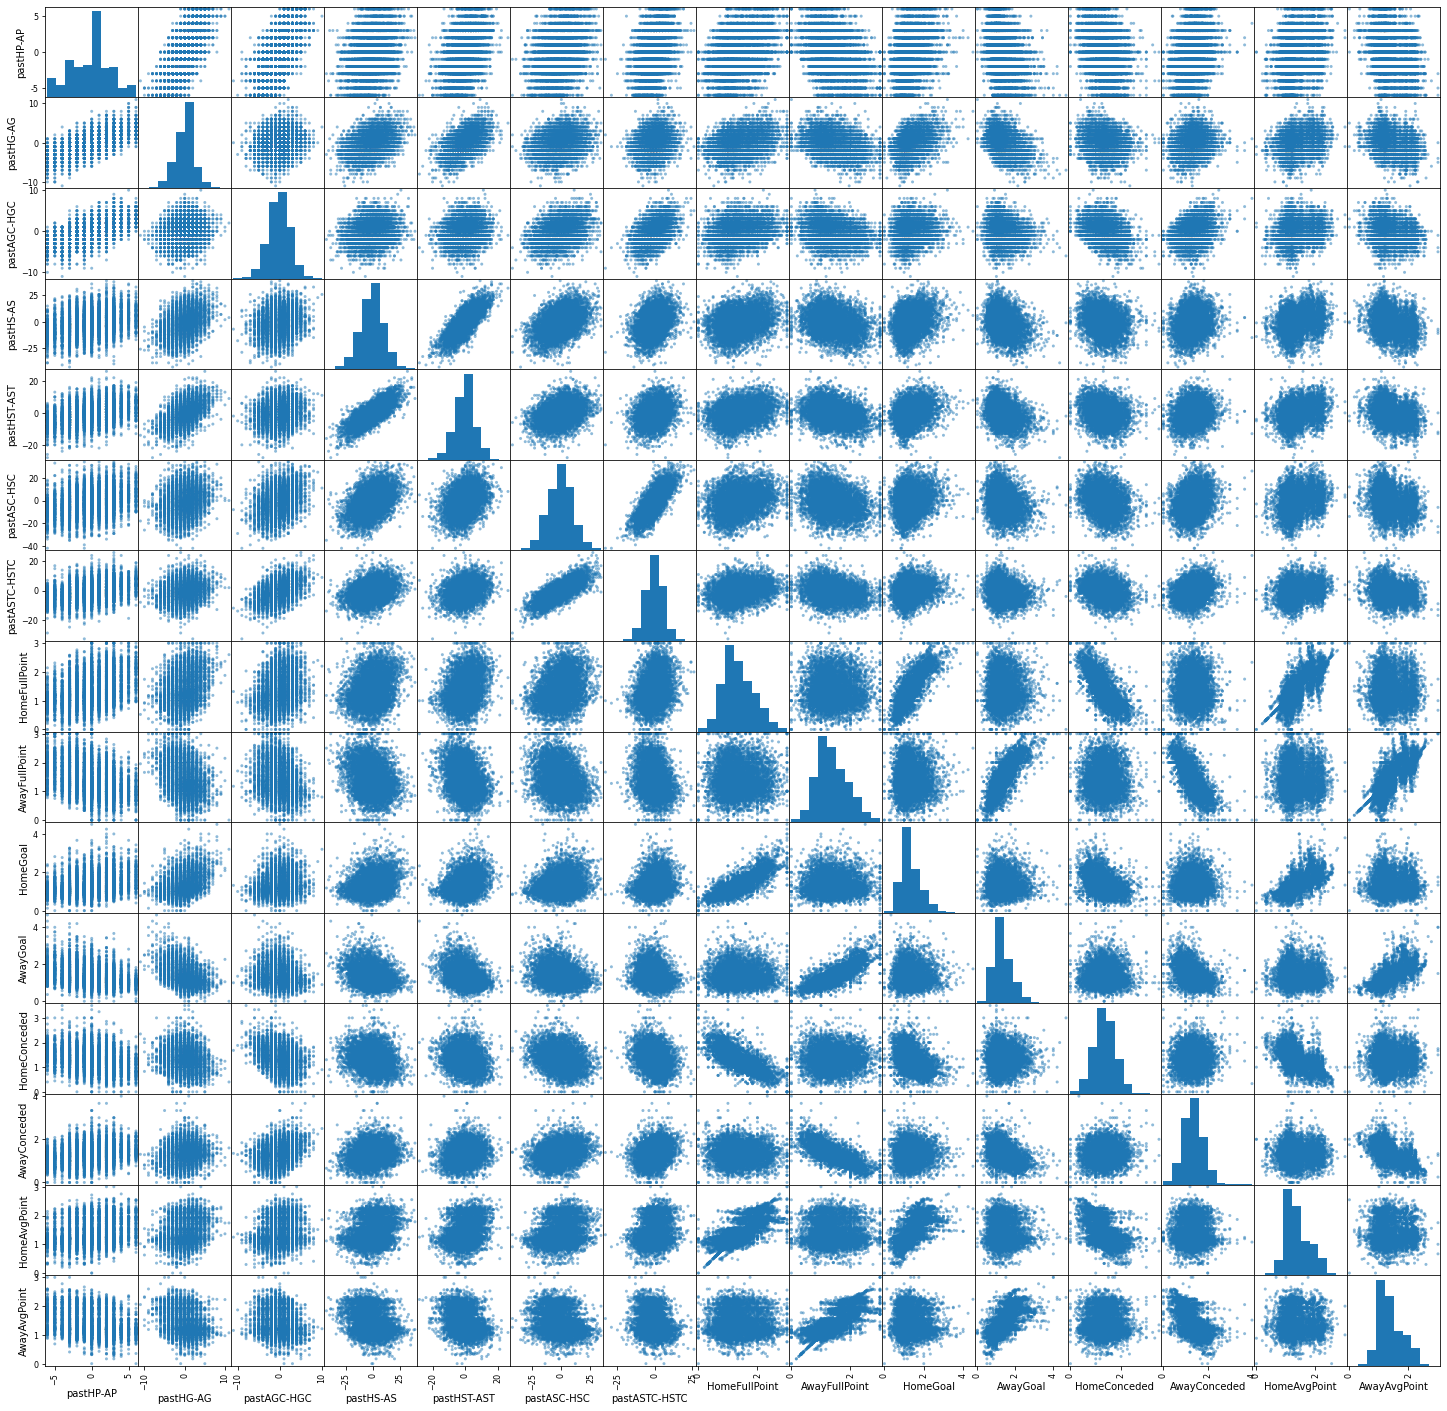

In [25]:
from pandas.plotting import scatter_matrix
scatter_matrix(x, figsize=(25, 25), grid=True)

In [27]:
describe = (x.describe())

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print((x.describe()))

         pastHP-AP    pastHG-AG  pastAGC-HGC    pastHS-AS  pastHST-AST  \
count  6300.000000  6300.000000  6300.000000  6300.000000  6300.000000   
mean     -0.241270    -0.169524    -0.171270    -1.026349    -0.449206   
std       2.703513     2.551920     2.494515    11.041117     6.206771   
min      -6.000000   -11.000000   -11.000000   -43.000000   -28.000000   
25%      -2.000000    -2.000000    -2.000000    -8.000000    -4.000000   
50%       0.000000     0.000000     0.000000    -1.000000     0.000000   
75%       2.000000     1.000000     1.000000     6.000000     4.000000   
max       6.000000    11.000000    10.000000    39.000000    26.000000   

       pastASC-HSC  pastASTC-HSTC  HomeFullPoint  AwayFullPoint     HomeGoal  \
count  6300.000000    6300.000000    6300.000000    6300.000000  6300.000000   
mean     -1.043333      -0.494444       1.364822       1.384733     1.333932   
std      10.879773       6.065615       0.533781       0.534752     0.514849   
min     -42.0

In [29]:
x.corr()

,pastHP-AP,pastHG-AG,pastAGC-HGC,pastHS-AS,pastHST-AST,pastASC-HSC,pastASTC-HSTC,HomeFullPoint,AwayFullPoint,HomeGoal,AwayGoal,HomeConceded,AwayConceded,HomeAvgPoint,AwayAvgPoint
pastHP-AP,1.000000,0.677194,0.610983,0.311582,0.412480,0.306759,0.363423,0.370296,-0.379784,0.290079,-0.310754,-0.275941,0.268484,0.289266,-0.293370
pastHG-AG,0.677194,1.000000,0.127714,0.375397,0.526809,0.212518,0.172919,0.299285,-0.316497,0.362251,-0.384474,-0.143143,0.156532,0.257870,-0.265639
pastAGC-HGC,0.610983,0.127714,1.000000,0.194869,0.177647,0.343978,0.495353,0.252257,-0.234303,0.137503,-0.138612,-0.346071,0.305641,0.189802,-0.177565
pastHS-AS,0.311582,0.375397,0.194869,1.000000,0.786303,0.447365,0.329550,0.268374,-0.261248,0.273401,-0.285143,-0.196506,0.184483,0.280413,-0.276611
pastHST-AST,0.412480,0.526809,0.177647,0.786303,1.000000,0.339094,0.264762,0.273460,-0.280854,0.288415,-0.311373,-0.185263,0.172987,0.281216,-0.291225
pastASC-HSC,0.306759,0.212518,0.343978,0.447365,0.339094,1.000000,0.770705,0.266190,-0.258413,0.224556,-0.227807,-0.257985,0.247139,0.264247,-0.244435
pastASTC-HSTC,0.363423,0.172919,0.495353,0.329550,0.264762,0.770705,1.000000,0.238030,-0.223339,0.176504,-0.168549,-0.257929,0.252173,0.221795,-0.205269
HomeFullPoint,0.370296,0.299285,0.252257,0.268374,0.273460,0.266190,0.238030,1.000000,0.012821,0.814222,-0.000204,-0.747046,-0.025986,0.758800,-0.005964
AwayFullPoint,-0.379784,-0.316497,-0.234303,-0.261248,-0.280854,-0.258413,-0.223339,0.012821,1.000000,0.003068,0.810626,-0.020745,-0.746941,-0.009076,0.758906
HomeGoal,0.290079,0.362251,0.137503,0.273401,0.288415,0.224556,0.176504,0.814222,0.003068,1.000000,0.012912,-0.413554,0.015635,0.675746,-0.012569


In [31]:
eps=1e-9
train_data_mean = np.mean(x, axis=0)
train_data_std = np.std(x, axis=0)
X = (x - train_data_mean) / (train_data_std + eps)

In [32]:
describe = (X.describe())

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print((X.describe()))

          pastHP-AP     pastHG-AG   pastAGC-HGC     pastHS-AS   pastHST-AST  \
count  6.300000e+03  6.300000e+03  6.300000e+03  6.300000e+03  6.300000e+03   
mean   2.731149e-16  1.966328e-16 -1.392184e-17 -3.334194e-17  4.934325e-18   
std    1.000079e+00  1.000079e+00  1.000079e+00  1.000079e+00  1.000079e+00   
min   -2.130261e+00 -4.244387e+00 -4.341360e+00 -3.801878e+00 -4.439181e+00   
25%   -6.505868e-01 -7.173507e-01 -7.331586e-01 -6.316575e-01 -5.721293e-01   
50%    8.925018e-02  6.643518e-02  6.866401e-02  2.386651e-03  7.237934e-02   
75%    8.290872e-01  4.583281e-01  4.695753e-01  6.364308e-01  7.168879e-01   
max    2.308761e+00  4.377257e+00  4.077777e+00  3.625496e+00  4.261685e+00   

        pastASC-HSC  pastASTC-HSTC  HomeFullPoint  AwayFullPoint  \
count  6.300000e+03   6.300000e+03   6.300000e+03   6.300000e+03   
mean  -3.513944e-17  -5.780209e-17  -6.097592e-15   4.604588e-15   
std    1.000079e+00   1.000079e+00   1.000079e+00   1.000079e+00   
min   -3.764777e

In [34]:
X.corr()

,pastHP-AP,pastHG-AG,pastAGC-HGC,pastHS-AS,pastHST-AST,pastASC-HSC,pastASTC-HSTC,HomeFullPoint,AwayFullPoint,HomeGoal,AwayGoal,HomeConceded,AwayConceded,HomeAvgPoint,AwayAvgPoint
pastHP-AP,1.000000,0.677194,0.610983,0.311582,0.412480,0.306759,0.363423,0.370296,-0.379784,0.290079,-0.310754,-0.275941,0.268484,0.289266,-0.293370
pastHG-AG,0.677194,1.000000,0.127714,0.375397,0.526809,0.212518,0.172919,0.299285,-0.316497,0.362251,-0.384474,-0.143143,0.156532,0.257870,-0.265639
pastAGC-HGC,0.610983,0.127714,1.000000,0.194869,0.177647,0.343978,0.495353,0.252257,-0.234303,0.137503,-0.138612,-0.346071,0.305641,0.189802,-0.177565
pastHS-AS,0.311582,0.375397,0.194869,1.000000,0.786303,0.447365,0.329550,0.268374,-0.261248,0.273401,-0.285143,-0.196506,0.184483,0.280413,-0.276611
pastHST-AST,0.412480,0.526809,0.177647,0.786303,1.000000,0.339094,0.264762,0.273460,-0.280854,0.288415,-0.311373,-0.185263,0.172987,0.281216,-0.291225
pastASC-HSC,0.306759,0.212518,0.343978,0.447365,0.339094,1.000000,0.770705,0.266190,-0.258413,0.224556,-0.227807,-0.257985,0.247139,0.264247,-0.244435
pastASTC-HSTC,0.363423,0.172919,0.495353,0.329550,0.264762,0.770705,1.000000,0.238030,-0.223339,0.176504,-0.168549,-0.257929,0.252173,0.221795,-0.205269
HomeFullPoint,0.370296,0.299285,0.252257,0.268374,0.273460,0.266190,0.238030,1.000000,0.012821,0.814222,-0.000204,-0.747046,-0.025986,0.758800,-0.005964
AwayFullPoint,-0.379784,-0.316497,-0.234303,-0.261248,-0.280854,-0.258413,-0.223339,0.012821,1.000000,0.003068,0.810626,-0.020745,-0.746941,-0.009076,0.758906
HomeGoal,0.290079,0.362251,0.137503,0.273401,0.288415,0.224556,0.176504,0.814222,0.003068,1.000000,0.012912,-0.413554,0.015635,0.675746,-0.012569
